# Simple Statistics

Typografen richtten vanaf 1837 in verschillende steden in Nederland een vereniging op voor onderlinge hulp bij ziekte en voor het organiseren van het Kopperfeest op de eerste maandag na Driekoningen, maar ook andere gelegenheden. Bij feesten zongen zij eigen geschreven teksten op bekende melodieen. Ik probeer zoveel mogelijk van deze teksten, in ieder geval tot 1869 machineleesbaar in te voeren. Daarbij houd ik een CSV-bestand bij van alle liedjes, met daarin de volgende velden: (item,id,titel,wijze,jaartal,schrijver,vereniging_schrijver)
* URL in Zotero
* Identifier van het liedje, opgebouwd uit een code voor de typografische vereniging (indien van toepassing), het titelwoord van het boekje, het jaartal van uitgave en het volgnummer van het liedje in het bewust boekje.
* Titel van het liedje
* Wijze van de melodie
* Jaartal van schrijven
* Schrijver
* Vereniging van de schrijver

Deze notebook geeft een overzicht van de data die ik weet over de liedjes (die tot nu toe zijn ingevoerd). Allereerst lees ik de data in een pandas dataframe.

In [121]:
import pandas as pd

df = pd.read_csv("../../data/liedjes/liedjes.csv")

Ik wil een overzicht van het aantal liedjes per jaar en per vereniging. Maar eerst: hoeveel liedjes zijn er in totaal en van hoeveel weten we het jaartal en van hoeveel weten we de vereniging.

In [122]:
len(df)

721

In [123]:
df['jaartal'].count()

714

In [124]:
df['vereniging_schrijver'].count()

716

In [125]:
draaitabel = pd.crosstab(df['vereniging_schrijver'], df['jaartal'], margins = True)
draaitabel

jaartal,1848.0,1849.0,1850.0,1851.0,1852.0,1853.0,1854.0,1855.0,1856.0,1857.0,...,1861.0,1862.0,1863.0,1864.0,1865.0,1866.0,1867.0,1868.0,1869.0,All
vereniging_schrijver,,,,,,,,,,,,,,,,,,,,,
amsterdam1847,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
amsterdam1849,0,0,0,6,22,0,0,0,16,16,...,12,9,10,4,6,0,0,0,0,127
amsterdam1857-1,0,0,0,0,0,0,0,0,0,0,...,29,20,27,0,12,0,0,0,0,125
arnhem1849,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,1,8,24
denbosch1849,0,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,3
denhaag1843,0,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,11
gorinchem1856,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,5
haarlem1851,0,0,0,0,25,4,0,0,11,0,...,4,10,0,0,0,0,0,0,0,62
leiden1854,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,7,0,0,0,0,10


Het aantal liedjes in deze draaitabel (aka kruistabel) is niet hetzelfde als de lengte van de dataframe, omdat niet van alle liedjes een jaartal en/of een vereniging bekend is.

In [126]:
# de functie value_counts() ordent op de waarde
df['jaartal'].value_counts()

1856.0    80
1861.0    77
1863.0    66
1859.0    58
1852.0    52
1862.0    48
1858.0    47
1854.0    44
1853.0    40
1860.0    35
1855.0    28
1865.0    25
1857.0    23
1869.0    18
1848.0    14
1864.0    13
1868.0    10
1866.0    10
1851.0     8
1850.0     8
1867.0     7
1849.0     3
Name: jaartal, dtype: int64

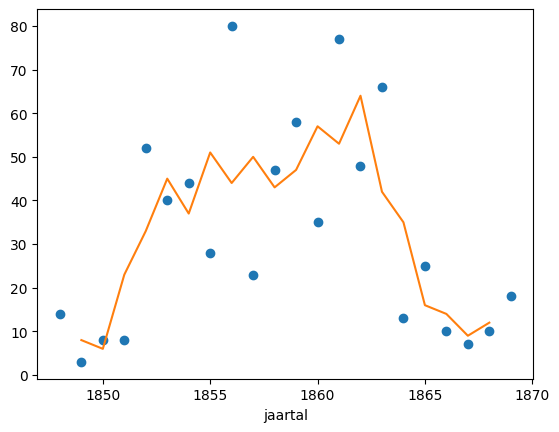

In [127]:
count = df.groupby('jaartal').size()

# Bepaal drie jarige lopende gemiddelde
runAvg = {}
year = 1849
while year < 1869:
    runAvg[year] = round((count.get(year - 1) + count.get(year) + count.get(year + 1)) / 3)
    year = year + 1

# plot gemiddelden
import matplotlib.pylab as plt

count.plot(style = "o")

lists = sorted(runAvg.items())
x, y = zip(*lists)
plt.plot(x, y)


In [137]:
df.groupby('typoID').size()

typoID
amsterdam1847       12
amsterdam1849      108
amsterdam1857-1    119
arnhem1849          25
denbosch1849         1
gorinchem1856        5
haarlem1851         54
leiden1854           7
middelburg1847      88
utrecht1851        238
dtype: int64

In [128]:
df.groupby('jaartal').size()

jaartal
1848.0    14
1849.0     3
1850.0     8
1851.0     8
1852.0    52
1853.0    40
1854.0    44
1855.0    28
1856.0    80
1857.0    23
1858.0    47
1859.0    58
1860.0    35
1861.0    77
1862.0    48
1863.0    66
1864.0    13
1865.0    25
1866.0    10
1867.0     7
1868.0    10
1869.0    18
dtype: int64

Nu per vereniging:

<AxesSubplot: xlabel='vereniging_schrijver'>

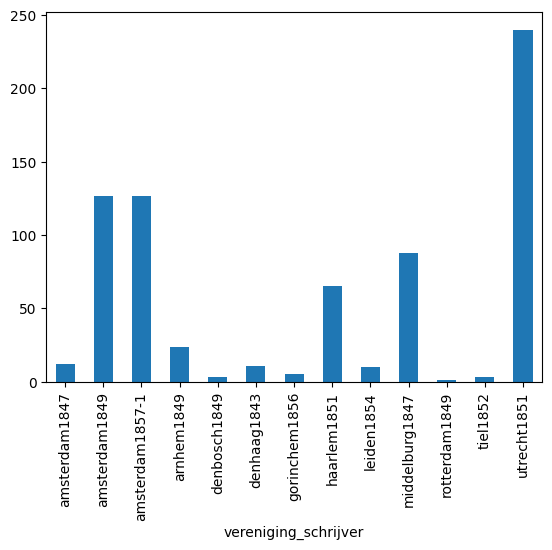

In [129]:
# df['vereniging_schrijver'].value_counts().plot(kind = 'bar')

df.groupby('vereniging_schrijver').size().plot(kind = "bar") 

Welke auteurs hebben 10 of meer liedjes geschreven?

In [138]:
df['schrijver'].value_counts().loc[lambda x : x > 9]

C. Mommaas             45
M. Smidt               38
J.H.C. Venman          31
B. Lageman             14
W. Farber              14
J.C. Paap              12
J.J. van Stempfoort    11
P. Werthweijn          11
P.G. van de Kamp       11
J. Breeman             10
Name: schrijver, dtype: int64

In [139]:
df['wijze'].value_counts().loc[lambda x : x > 9]

Wien Neerlands bloed                       96
Henri's drinklied                          57
De wereld is in rep en roer                44
Io Vivat                                   43
De Koning leef                             21
Wie praalt aan 't hoofd der Heldenstoet    17
Eens werd er aan de zeeuwsche kust         15
God save the king                          12
Schep vreugde in 't leven                  12
Name: wijze, dtype: int64

In [140]:
df_subset = df.groupby("wijze").filter(lambda x: len(x) > 9)
draaitabel = pd.crosstab(df_subset['wijze'], df_subset['jaartal'], margins = True)
draaitabel

jaartal,1848.0,1849.0,1850.0,1851.0,1852.0,1853.0,1854.0,1855.0,1856.0,1857.0,...,1859.0,1860.0,1861.0,1862.0,1863.0,1864.0,1865.0,1866.0,1869.0,All
wijze,,,,,,,,,,,,,,,,,,,,,
De Koning leef,0,0,0,0,0,4,2,1,4,0,...,0,1,0,0,3,2,2,0,1,20
De wereld is in rep en roer,1,0,0,0,2,0,1,2,8,2,...,5,1,4,3,4,1,3,1,0,44
Eens werd er aan de zeeuwsche kust,0,0,0,0,1,2,0,1,4,1,...,0,0,0,2,1,0,1,0,0,15
God save the king,1,0,1,1,0,2,1,2,0,0,...,0,1,2,1,0,0,0,0,0,12
Henri's drinklied,0,0,0,0,4,1,5,0,9,5,...,7,2,6,5,5,1,4,0,1,57
Io Vivat,2,1,0,0,1,3,3,2,2,0,...,5,4,7,3,3,0,1,0,0,43
Schep vreugde in 't leven,0,0,1,0,0,0,1,0,2,1,...,1,0,3,1,1,0,0,0,0,12
Wie praalt aan 't hoofd der Heldenstoet,0,0,0,1,3,2,1,0,2,1,...,2,1,1,0,0,0,1,0,1,17
Wien Neerlands bloed,0,0,1,3,6,4,5,0,11,2,...,11,6,13,8,12,2,5,3,0,96


In [157]:
ding = df.groupby(['jaartal', 'sourceID']).size().to_frame()
ding

0
jaartal sourceID                          
1848.0  amsterdam1847-reglement1848     12
        middelburg1847-feestbundel1864   2
1849.0  middelburg1847-feestbundel1864   3
1850.0  middelburg1847-feestbundel1864   8
1851.0  amsterdam1849-feestbundel1851    6
...                                     ..
1867.0  utrecht1851-feestzangen1867      7
1868.0  arnhem1849-coupletten1868        2
        utrecht1851-feestzangen1868      8
1869.0  arnhem1849-feestboekje1869       8
        utrecht1851-feestzangen1869     10

[80 rows x 1 columns]